###### https://github.com/mahesh147/KMeans-Clustering/blob/master/kmeans_clustering.py
###### https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [75]:
# Imports packages
import random, os, sys, shutil
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import keras
# from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import preprocess_input # change for each one
from keras.preprocessing import image as imagex
from keras.applications.resnet50 import ResNet50
import glob
import scipy
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
# Check if there are unreadable images in the source folder
filenames= os.listdir("C:/Users/yaoji/Desktop/Jing/vgg_real")
for file in filenames:
    try:
        image = cv2.resize(cv2.imread(file), (224, 224))
    except:
        print(file)

cropcenter_w_rotated360_295569_3.jpeg
cropcenter_w_rotated360_297524_10.jpeg
cropcenter_w_rotated360_299020_14.jpeg
cropcenter_w_rotated360_299020_15.jpeg
cropcenter_w_rotated360_302685_30.jpeg
cropcenter_w_rotated360_303180_33.jpeg
cropcenter_w_rotated360_305522_38.jpeg
cropcenter_w_rotated360_305561_42.jpeg
cropcenter_w_rotated360_305561_43.jpeg
cropcenter_w_rotated360_305561_44.jpeg
cropcenter_w_rotated360_305685_45.jpeg
cropcenter_w_rotated360_306163_49.jpeg
cropcenter_w_rotated360_307040_53.jpeg
cropcenter_w_rotated360_307859_62.jpeg
cropcenter_w_rotated360_307859_63.jpeg
cropcenter_w_rotated360_307859_64.jpeg
cropcenter_w_rotated360_308593_67.jpeg
cropcenter_w_rotated360_309194_70.jpeg
cropcenter_w_rotated360_309233_71.jpeg
cropcenter_w_rotated360_311103_90.jpeg
cropcenter_w_rotated360_311372_91.jpeg
cropcenter_w_rotated360_311372_92.jpeg
cropcenter_w_rotated360_312569_95.jpeg
cropcenter_w_rotated360_312569_96.jpeg
cropcenter_w_rotated360_312654_97.jpeg
cropcenter_w_rotated360_31

cropcenter_w_rotated360_524912_309.jpeg
cropcenter_w_rotated360_524912_310.jpeg
cropcenter_w_rotated360_524916_311.jpeg
cropcenter_w_rotated360_524916_314.jpeg
cropcenter_w_rotated360_524916_315.jpeg
cropcenter_w_rotated360_527963_335.jpeg
cropcenter_w_rotated360_527963_336.jpeg
cropcenter_w_rotated360_527963_337.jpeg
cropcenter_w_rotated360_529194_354.jpeg
cropcenter_w_rotated360_529194_355.jpeg
cropcenter_w_rotated360_529256_358.jpeg
cropcenter_w_rotated360_530322_374.jpeg
cropcenter_w_rotated360_530322_375.jpeg
cropcenter_w_rotated360_530503_378.jpeg
cropcenter_w_rotated360_530891_381.jpeg
cropcenter_w_rotated360_534615_413.jpeg
cropcenter_w_rotated360_536197_419.jpeg
cropcenter_w_rotated360_536197_420.jpeg
cropcenter_w_rotated360_543510_461.jpeg
cropcenter_w_rotated360_543510_462.jpeg
cropcenter_w_rotated360_543510_463.jpeg
cropcenter_w_rotated360_543510_464.jpeg
cropcenter_w_rotated360_544366_466.jpeg
cropcenter_w_rotated360_544366_468.jpeg
cropcenter_w_rotated360_555784_506.jpeg


# Part 1 
## Feed Model

In [72]:
#initial set up
data_path = "C:/Users/yaoji/Desktop/Jing/vgg_real"
paths = os.listdir(data_path)
max_examples = len(paths)
# n_clusters = 4
random.shuffle(paths)
image_paths = paths[:max_examples]
use_imagenets = "ResNet50"
use_pca = False
del paths 
try:
    shutil.rmtree("output")
except FileExistsError:
    pass
print("\n output folders created.")
os.makedirs("output")
# for i in range(n_clusters):
#     os.makedirs("output\\cluster" + str(i))
# print("\n Object of class \"image_clustering\" has been initialized.")


#image manipulation
images = []
for image in image_paths:
    img = cv2.cvtColor(cv2.resize(cv2.imread(data_path + "\\" + image), (224,224)), cv2.COLOR_BGR2RGB)         
    x = imagex.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x)
images = np.float32(images).reshape(len(images), 224,224,3)
images /= 255
print("\n " + str(max_examples) + " images from the \"" + folder_path + "\" folder have been loaded in a random order.")

#feed to resnet50
if use_imagenets.lower() == "resnet50":
    model1 = keras.applications.resnet50.ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))         
else:
    print("\n\n Please use one of the following keras applications only [ \"resnet50\"] or False")
    sys.exit()
print("imgnets!!!!!!!!!!     ",use_imagenets.lower())
print("img         ",images)
pred = model1.predict(images)
images_temp = pred.reshape(images.shape[0], -1)
if use_pca == False: 
    images_new = images_temp
else: 
    model2 = PCA(n_components=None, random_state=728)
    model2.fit(images_temp)
    images_new = model2


 output folders created.

 436 images from the "data" folder have been loaded in a random order.


C:\Users\yaoji\.conda\envs\tensorflow_env\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


imgnets!!!!!!!!!!      resnet50
img          [[[[ 0.0512196   0.00086667  0.02870588]
   [ 0.0512196   0.00086667  0.02870588]
   [ 0.04337646 -0.00697647  0.02086274]
   ...
   [ 0.1374941   0.10674902  0.14635295]
   [ 0.1257294   0.10282745  0.14635295]
   [ 0.11004312  0.09106275  0.13850981]]

  [[ 0.0512196   0.00086667  0.02870588]
   [ 0.0512196   0.00086667  0.02870588]
   [ 0.04337646 -0.00697647  0.02086274]
   ...
   [ 0.09435685  0.06753334  0.11498039]
   [ 0.09827842  0.07929804  0.13458823]
   [ 0.08651371  0.07537647  0.13458823]]

  [[ 0.0512196   0.00086667  0.02870588]
   [ 0.0512196   0.00086667  0.02870588]
   [ 0.04337646 -0.00697647  0.02086274]
   ...
   [ 0.06690587  0.0596902   0.12282353]
   [ 0.07867058  0.0714549   0.14243138]
   [ 0.07474901  0.0714549   0.14635295]]

  ...

  [[ 0.31004313  0.24792549  0.22870588]
   [ 0.31004313  0.24792549  0.22870588]
   [ 0.30612156  0.24400392  0.22478431]
   ...
   [ 0.5806314   0.54204315  0.51498044]
   [ 0.57670

## Tune Parameter: K

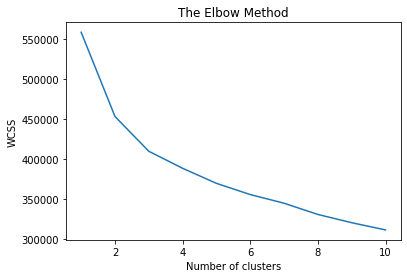

In [66]:
#tune kmeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 728)
    kmeans.fit(images_new)
    wcss.append(kmeans.inertia_)#inertia_:Sum of squared distances of samples to their closest cluster center for each dimension
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()   

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
ss=[]
for n in range(1,10):
    kmeans1 = KMeans(n_clusters = k).fit(images_new)
    centroids = kmeans1.cluster_centers_
    pred_clusters = kmeans1.predict(images_new)
    ss.append(silhouette_score(images_new, pred_clusters))

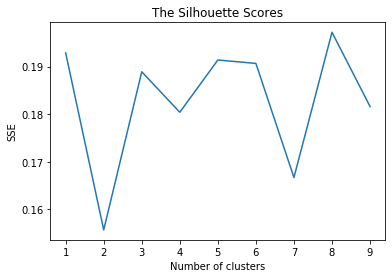

In [71]:
# Plot the graph to visualize the Silhousette Scores find the optimal number of cluster  
plt.plot(range(1,10),ss)
plt.title('The Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()   

### For the number of clusters to be relatively good, we want the Elbow to be low and the Silhouette Score to be high. Depending on the actual conditions, we can choose between 1-3 points. For example, here we can choose 3,5,8. 8 actually looks better, but we don't have that much images on hand, so I may choose 5.

### Please also notice that here I tune the parameters based on kmeans clustering. Different clustering methods may have slightly different results.

# Part 2 
## Feed model with the K decided from the previous step

In [77]:
class image_clustering:

    def __init__(self, folder_path="data", n_clusters=5, max_examples=None, use_imagenets="ResNet50", use_pca=False):
        paths = os.listdir(folder_path)
        if max_examples == None:
            self.max_examples = len(paths)
        else:
            if max_examples > len(paths):
                self.max_examples = len(paths)
            else:
                self.max_examples = max_examples
        self.n_clusters = n_clusters
        self.folder_path = folder_path
        random.shuffle(paths)
        self.image_paths = paths[:self.max_examples]
        self.use_imagenets = use_imagenets
        self.use_pca = use_pca
        del paths 
        try:
            shutil.rmtree("output")
        except FileExistsError:
            pass
        print("\n output folders created.")
        os.makedirs("output")
        for i in range(self.n_clusters):
            os.makedirs("output\\cluster" + str(i))
        print("\n Object of class \"image_clustering\" has been initialized.")

    def load_images(self):
        self.images = []
        for image in self.image_paths:          
            img = cv2.cvtColor(cv2.resize(cv2.imread(self.folder_path + "\\" + image), (224,224)), cv2.COLOR_BGR2RGB)         
            x = imagex.img_to_array(img)
            # x = np.vstack(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            #self.images = np.vstack(x)
            self.images.append(x)
            #self.images = np.reshape(self.images, (2180, 150528, 1))
            #self.images.append(cv2.cvtColor(cv2.resize(cv2.imread(self.folder_path + "\\" + image), (224,224)), cv2.COLOR_BGR2RGB))
            #self.images.append(preprocess_input(np.expand_dims(image.img_to_array(cv2.cvtColor(cv2.resize(cv2.imread(self.folder_path + "\\" + image), (224,224)), cv2.COLOR_BGR2RGB))),axis=0))
        self.images = np.float32(self.images).reshape(len(self.images), 224,224,3)
        # X_train = np.empty((len(filenames), 224, 224, 3)) # images must be 224*224
        #self.images = np.vstack(images)
        #img = image.load_img(img_path, target_size=(224, 224))
        #img = image.img_to_array(img) / 255.0
        self.images /= 255
        print("\n " + str(self.max_examples) + " images from the \"" + self.folder_path + "\" folder have been loaded in a random order.")
        #img = image.load_img(img_path, target_size=(224, 224))
        #self.images = image.img_to_array(self.images)
        #self.images = np.expand_dims(self.images, axis=0)
        #self.images = preprocess_input(self.images)
        
    def get_new_imagevectors(self):
        if self.use_imagenets == False:
            self.images_new = self.images
        else:
            if use_imagenets.lower() == "resnet50":
                model1 = keras.applications.resnet50.ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))         
            else:
                print("\n\n Please use one of the following keras applications only [ \"resnet50\"] or False")
                sys.exit()
            print("imgnets!!!!!!!!!!     ",use_imagenets.lower())
            print("img         ",self.images)
            pred = model1.predict(self.images)
            images_temp = pred.reshape(self.images.shape[0], -1)
            if self.use_pca == False: 
                self.images_new = images_temp
            else: 
                model2 = PCA(n_components=None, random_state=728)
                model2.fit(images_temp)
                self.images_new = model2            

    def clustering(self):
        model_c = KMeans(n_clusters=self.n_clusters, n_jobs=-1, random_state=728)
        model_c.fit(self.images_new)
        predictions = model_c.predict(self.images_new)   
        dists = euclidean_distances(model_c.cluster_centers_) #print distance between clusters
        print(dists)
        tri_dists = dists[np.triu_indices(3, 1)]
        max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()
        print("distance be")
        print(max_dist, avg_dist, min_dist)  
        print("The silhouette score is:")
        print(silhouette_score(self.images_new, predictions))
        # higher better
        print("The Sum of squared distances of samples to their closest cluster center for each dimension is:")
        print(model_c.inertia_)
        # Lower better
        print("The ratio between the within-cluster dispersion and the between-cluster dispersion is:")
        print(calinski_harabasz_score(self.images_new, predictions))
        # The higher the value, the "better" is the solution
        print("the average similarity measure of each cluster with its most similar cluster is:")
        print(davies_bouldin_score(self.images_new, predictions))
        # Similarity is the ratio of within-cluster distances to between-cluster distances
        # Clusters that are farther apart and less dispersed have better scores
        # The higher the score the better the separation is   
        #print(predictions)
        for i in range(self.max_examples):
            shutil.copy2(self.folder_path+"\\"+self.image_paths[i], "output\cluster"+str(predictions[i]))
        print("\n Clustering complete! \n\n Clusters and the respective images are stored in the \"output\" folder.")


if __name__ == "__main__":

    print("\n\n \t\t START\n\n")

    number_of_clusters = 5 # cluster names will be 0 to number_of_clusters-1

    data_path = "C:/Users/yaoji/Desktop/Jing/vgg_real"
    #data_path = "C:/Users/yaoji/Desktop/Jing/Good_Rotate_w_crop" # path of the folder that contains the images to be considered for the clustering (The folder must contain only image files)

    max_examples = None # number of examples to use, if "None" all of the images will be taken into consideration for the clustering 

    use_imagenets = "ResNet50" #"ResNet50"
    # choose from: "Xception", "VGG16", "VGG19", "ResNet50", "InceptionV3", "InceptionResNetV2", "DenseNet", "MobileNetV2" and "False"

    if use_imagenets == False:
        use_pca = False
    else:
        use_pca = False # Make it True if you want to use PCA for dimentionaity reduction -> Default is: False

    temp = image_clustering(data_path, number_of_clusters, max_examples, use_imagenets, use_pca)
    temp.load_images()
    temp.get_new_imagevectors()
    #temp.clustering()

    print("\n\n\t\t END\n\n")



 		 START



 output folders created.

 Object of class "image_clustering" has been initialized.

 436 images from the "C:/Users/yaoji/Desktop/Jing/vgg_real" folder have been loaded in a random order.
imgnets!!!!!!!!!!      resnet50
img          [[[[-1.05643146e-01 -1.99133337e-01 -2.10509807e-01]
   [-1.17407858e-01 -2.10898042e-01 -2.26196080e-01]
   [-1.13486283e-01 -2.06976473e-01 -2.22274512e-01]
   ...
   [ 5.88474512e-01  5.38121581e-01  5.11058867e-01]
   [ 5.76709807e-01  5.26356876e-01  4.99294102e-01]
   [ 5.80631375e-01  5.30278444e-01  5.03215730e-01]]

  [[-1.05643146e-01 -1.95211768e-01 -2.14431375e-01]
   [-1.01721577e-01 -1.95211768e-01 -2.10509807e-01]
   [-8.99568722e-02 -1.83447063e-01 -1.94823533e-01]
   ...
   [ 5.76709807e-01  5.26356876e-01  4.99294102e-01]
   [ 5.92396080e-01  5.42043149e-01  5.14980435e-01]
   [ 5.92396080e-01  5.42043149e-01  5.14980435e-01]]

  [[-7.81921670e-02 -1.71682343e-01 -1.86980397e-01]
   [-8.21137354e-02 -1.75603926e-01 -1.909019



		 END


